# Turbofan Engine Degradation Simulation
Cet ensemble de données contient des simulations de dégradation de moteurs à turbofan sous différentes conditions opérationnelles et modes de panne. Les signaux de capteurs enregistrent l'évolution des pannes.

Engine degradation simulation was carried out using the Commercial Modular Aero-Propulsion System Simulation (C-MAPSS). Four different sets were simulated under different combinations of operational conditions and fault modes. This records several sensor channels to characterize fault evolution. The data set was provided by the NASA Ames Prognostics Center of Excellence (PCoE).

- Download: https://data.nasa.gov/Aeorspace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6  
- Download Mirror: https://phm-datasets.s3.amazonaws.com/NASA/6.+Turbofan+Engine+Degradation+Simulation+Data+Set.zip
- Data Set Citation: A. Saxena and K. Goebel (2008). “Turbofan Engine Degradation Simulation Data Set”, NASA Prognostics Data Repository, NASA Ames Research Center, Moffett Field, CA

La simulation de la dégradation du moteur a été réalisée à l'aide de C-MAPSS. Quatre ensembles différents ont été simulés sous différentes combinaisons de conditions opérationnelles et de modes de panne. Plusieurs canaux de capteurs ont été enregistrés pour caractériser l'évolution des pannes. Le jeu de données a été fourni par le Prognostics CoE au NASA Ames.
Format : L'ensemble est au format texte et a été compressé en zip, y compris un fichier readme.


- RUL (Remaining Useful Life) = Durée de vie restante

# Plus de détails

- FD : ensemble simulé sous des combinaisons de conditions opérationnelles et de modes de panne précises

Les ensembles de données se composent de plusieurs séries chronologiques multivariées. Chaque ensemble de données est en outre divisé en sous-ensembles de formation et de test. Chaque série chronologique provient d'un moteur différent, c'est-à-dire que les données peuvent être considérées comme provenant d'une flotte de moteurs du même type. Chaque moteur commence avec différents degrés d'usure initiale et de variation de fabrication inconnue de l'utilisateur. Cette usure et cette variation sont considérées comme normales, c'est-à-dire qu'elles ne sont pas considérées comme des conditions de panne. Il y a trois réglages opérationnels qui ont un effet substantiel sur les performances du moteur. Ces réglages sont également inclus dans les données. Les données sont contaminées par le bruit des capteurs.

Le moteur fonctionne normalement au début de chaque série chronologique et développe une panne à un moment donné de la série. Dans l'ensemble de formation, la panne augmente en magnitude jusqu'à la défaillance du système. Dans l'ensemble de test, la série chronologique se termine quelque temps avant la défaillance du système. L'objectif de la compétition est de prédire le nombre de cycles opérationnels restants avant la défaillance dans l'ensemble de test, c'est-à-dire le nombre de cycles opérationnels après le dernier cycle pendant lequel le moteur continuera de fonctionner. Un vecteur des vraies valeurs de Durée de Vie Restante (RUL) est également fourni pour les données de test.

Les données sont fournies sous forme de fichier texte compressé en zip avec 26 colonnes de chiffres, séparées par des espaces. Chaque ligne est une capture de données prise au cours d'un cycle opérationnel unique, chaque colonne est une variable différente. Les colonnes correspondent à :
- Unit_number : un moteur
- time_in_cycles : série chronologique de temps
- operational_setting : conditions opérationnelles (Altitude, Vitesse en Mach, Angle de l'automanette ou le régulateur de la poussée de l'avion)
- sensor_measurement : données des 26 capteurs


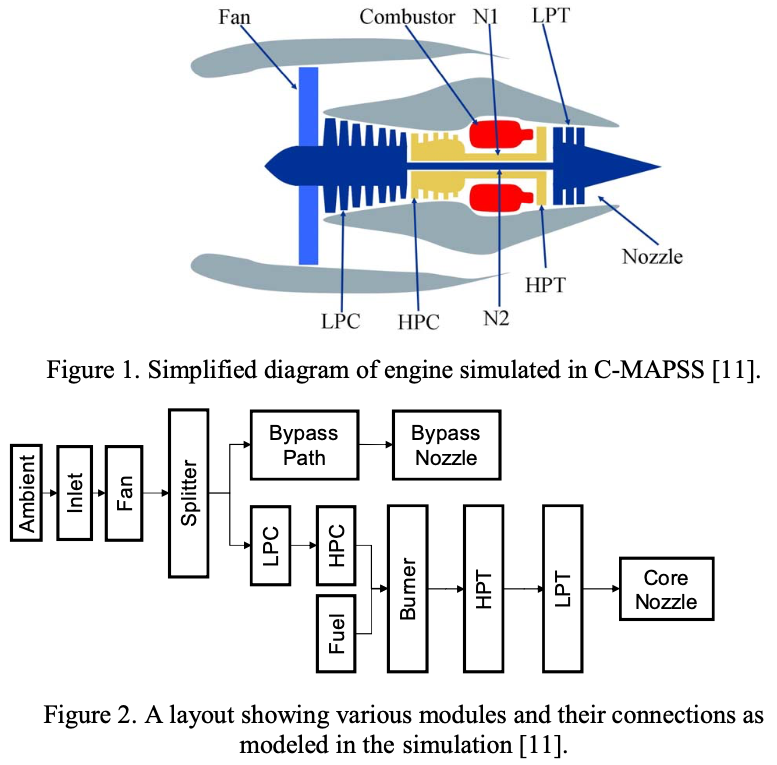

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram
from io import BytesIO
import cv2
from scipy.fft import fftshift

In [3]:
# Définir les chemins des répertoires de données
data_dir = "Data"
train_dir = os.path.join(data_dir, "train")
rul_dir = os.path.join(data_dir, "RUL")
test_dir = os.path.join(data_dir, "test")

# Lister les fichiers dans chaque répertoire
train_files = os.listdir(train_dir)
rul_files = os.listdir(rul_dir)
test_files = os.listdir(test_dir)

# Fonction pour charger les données
def load_data(file_path, columns):
    return pd.read_csv(file_path, sep='\s+', header=None, names=columns)

# Définir les colonnes pour les fichiers train et test
columns = [
    'unit_number', 'time_in_cycles', 'altitude', 'mach', 'TRA',
    'sensor_measurement_1', 'sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4',
    'sensor_measurement_5', 'sensor_measurement_6', 'sensor_measurement_7', 'sensor_measurement_8',
    'sensor_measurement_9', 'sensor_measurement_10', 'sensor_measurement_11', 'sensor_measurement_12',
    'sensor_measurement_13', 'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_16',
    'sensor_measurement_17', 'sensor_measurement_18', 'sensor_measurement_19', 'sensor_measurement_20',
    'sensor_measurement_21', 'sensor_measurement_22', 'sensor_measurement_23', 'sensor_measurement_24',
    'sensor_measurement_25', 'sensor_measurement_26'
]

# Exemple de chargement des données de train et test pour FD001
#sensors_data1 = load_data(os.path.join(train_dir, 'train_FD001.txt'), columns)
#test_fd1 = load_data(os.path.join(test_dir, 'test_FD001.txt'), columns)

# Charger les données RUL
#rul_fd1 = pd.read_csv(os.path.join(rul_dir, 'RUL_FD001.txt'), header=None, names=['RUL'])

sensors_data = []
for files in train_files :
    data = load_data(os.path.join(train_dir, files), columns)
    sensors_data.append(data)

rul = []
for files in rul_files :
    dataset = pd.read_csv(os.path.join(rul_dir, files), header=None, names=['RUL'])
    rul.append(dataset)

In [4]:
sensors_data[0]

,unit_number,time_in_cycles,altitude,mach,TRA,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,sensor_measurement_22,sensor_measurement_23,sensor_measurement_24,sensor_measurement_25,sensor_measurement_26
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,392,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,392,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,390,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,392,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,393,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,397,2388,100.0,38.49,22.9735,NaN,NaN,NaN,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,395,2388,100.0,38.30,23.1594,NaN,NaN,NaN,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,398,2388,100.0,38.44,22.9333,NaN,NaN,NaN,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,395,2388,100.0,38.29,23.0640,NaN,NaN,NaN,NaN,NaN


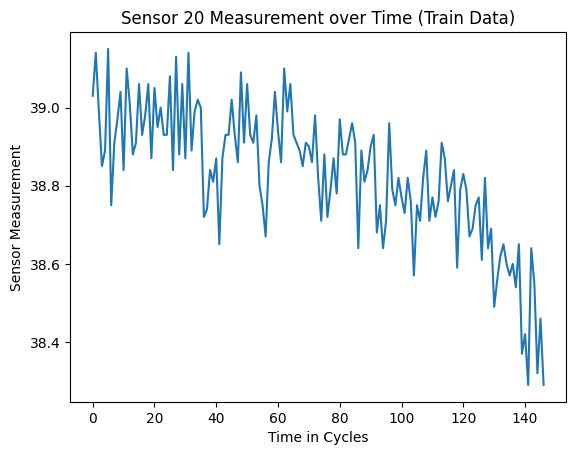

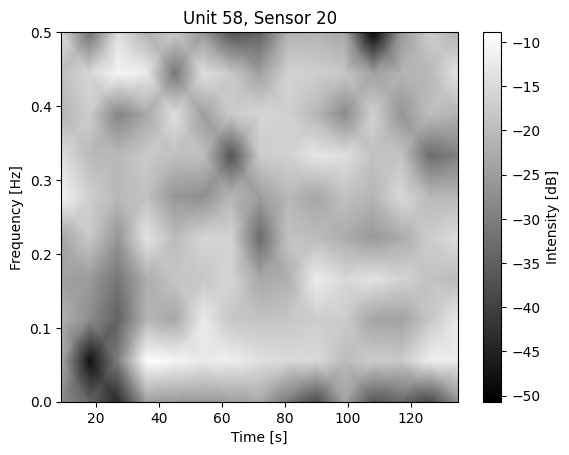

In [6]:
fd = 0
unit_number = 58
sensor = 20


sensor_column = f'sensor_measurement_{sensor}'
data = sensors_data[fd]
unit_data = data[data['unit_number'] == unit_number]

# Générer le spectrogramme
signal = unit_data[sensor_column].values
#signal = np.nan_to_num(signal, nan=0.0)

#plt.figure(figsize=(10, 6))
plt.plot(signal)
plt.title(f'Sensor {sensor} Measurement over Time (Train Data)')
plt.xlabel('Time in Cycles')
plt.ylabel('Sensor Measurement')
plt.show()

#f, t, Sxx = spectrogram(signal, fs=1, nperseg=len(signal), noverlap=len(signal)//2)
f, t, Sxx = spectrogram(signal, fs=1, nperseg=len(signal)//8, noverlap=len(signal)//16)

Sxx[Sxx == 0] = 1e-10

# Spectrogramme
#plt.figure(figsize=(10, 4))
plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='gray')
plt.title(f'Unit {unit_number}, Sensor {sensor}')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.colorbar(label='Intensity [dB]')
#plt.axis('off')
#plt.tight_layout()
plt.show()

Ce spectrogramme est utilisé pour visualiser la variation de fréquence d'un signal en fonction du temps.

In [283]:
# Fonction pour générer et afficher les spectrogrammes avec ajustements
def plot_spectrograms(fd, unit_number):
    for sensor in range(1, 27):  # 1 to 26
        sensor_column = f'sensor_measurement_{sensor}'

        data = sensors_data[fd]
        unit_data = data[data['unit_number'] == unit_number]

        # Générer le spectrogramme
        signal = unit_data[sensor_column].values
        #signal = np.nan_to_num(signal, nan=0.0)

        #if len(signal) != 0 and not np.all(signal == signal[0]):
        if not unit_data[sensor_column].isnull().all() :
            f, t, Sxx = spectrogram(signal, fs=1, nperseg=len(signal)//8, noverlap=len(signal)//16)

            Sxx[Sxx == 0] = 1e-10

            # Spectrogramme
            plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='gray')
            plt.axis('off')
            plt.tight_layout()
            plt.show()


# Entraîner le Modèle

## Diviser les Données en Ensembles d'Entraînement et de Test


In [286]:
from sklearn.model_selection import train_test_split

df = pd.concat([pd.DataFrame(sensors_data[0]['unit_number'].unique(), columns=['unit_number']), rul[0]], axis=1)

# Diviser les données en ensembles d'entraînement et de test
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(f'Train set size: {len(train_set)}')
print(f'Test set size: {len(test_set)}')


Train set size: 80
Test set size: 20


## Créer un Dataset Personnalisé

In [304]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import numpy as np
from PIL import Image
from io import BytesIO

class SpectrogramDataset(Dataset):
    def __init__(self, data, dataset, transform=None):
        self.data = data
        self.dataset = dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        unit_number = self.dataset.iloc[idx]['unit_number']
        rul = self.dataset.iloc[idx]['RUL']
        
        spectrograms = []
        for sensor in range(1, 27):  # 1 to 26
            sensor_column = f'sensor_measurement_{sensor}'
            unit_data = self.data[self.data['unit_number'] == unit_number]
            signal = unit_data[sensor_column].values
            #signal = np.nan_to_num(signal, nan=0.0)

            #if len(signal) == 0 or np.all(signal == signal[0]):
            if not unit_data[sensor_column].isnull().all() :
                #raise ValueError(f"Invalid signal for unit {unit_number}, sensor {sensor}")

                f, t, Sxx = spectrogram(signal, fs=1, nperseg=len(signal)//8, noverlap=len(signal)//16)
                Sxx[Sxx == 0] = 1e-10

                # Crée une figure Matplotlib pour dessiner le spectrogramme
                fig, ax = plt.subplots(figsize=(3, 3), dpi=224/3)
                ax.pcolormesh(t, f, 10 * np.log10(Sxx), shading='gouraud', cmap='gray')
                ax.axis('off')
                plt.tight_layout(pad=0)

                # Sauvegarde la figure dans un tampon (buf) comme une image PNG
                buf = BytesIO()
                plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
                buf.seek(0)
                plt.close(fig)

                # Convertit le tampon en image PIL
                img = Image.open(buf).convert('RGB')

                # Applique les transformations définies (si présentes)
                if self.transform:
                    img = self.transform(img)
                buf.close()

                # Ajoute l'image transformée à la liste spectrograms
                spectrograms.append(img)
            
            else :
                sensor+=1

        # Empiler les images des spectrogrammes en un seul tensor
        spectrogram_tensor = torch.stack(spectrograms)
        return spectrogram_tensor, torch.tensor(rul, dtype=torch.float32)

# Utilisation du dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_dataset = SpectrogramDataset(sensors_data[0], train_set, transform=transform)
test_dataset = SpectrogramDataset(sensors_data[0], test_set, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


- transforms.Compose : Permet de combiner plusieurs transformations en une seule.
- transforms.Resize((224, 224)) : Redimensionne chaque image à une taille de 224x224 pixels. Cette taille est couramment utilisée pour les modèles pré-entraînés comme ceux de la famille ResNet, VGG, etc.
- transforms.ToTensor() : Convertit une image PIL ou NumPy ndarray en un tensor PyTorch, et normalise les valeurs de pixels entre 0 et 1.

## Utiliser les DataLoader pour Entraîner et Tester le Modèle ViT

In [305]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.models import vit_b_16, ViT_B_16_Weights

# Charger un modèle ViT pré-entraîné avec les poids
weights = ViT_B_16_Weights.IMAGENET1K_V1
base_model = vit_b_16(weights=weights)

# Adapter le modèle ViT pour accepter les spectrogrammes empilés
class ViTForSpectrograms(nn.Module):
    def __init__(self, base_model):
        super(ViTForSpectrograms, self).__init__()
        self.base_model = base_model
        in_features = self.base_model.heads.head.in_features  # Accéder à in_features avant de remplacer la tête
        self.base_model.heads.head = nn.Identity()  # Supprimer la tête de classification initiale
        self.fc = nn.Linear(in_features, 1)

    def forward(self, x):
        batch_size, num_sensors, channels, height, width = x.size()
        x = x.view(batch_size * num_sensors, channels, height, width)
        x = self.base_model(x)
        x = x.view(batch_size, num_sensors, -1)
        x = torch.mean(x, dim=1)
        x = self.fc(x)
        return x

# Créer le modèle ViT adapté pour les spectrogrammes
model = ViTForSpectrograms(base_model)

# Définir la perte et l'optimiseur
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entraînement du modèle
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device).view(-1, 1)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

# Évaluation du modèle sur l'ensemble de test
model.eval()
test_loss = 0.0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device).view(-1, 1)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

print(f'Test Loss: {test_loss/len(test_loader)}')

# Sauvegarder le modèle entraîné
torch.save(model.state_dict(), 'vit_model.pth')


# Prédiction

In [ ]:
def predict(model, image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)  # Ajouter une dimension batch
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return predicted.item()

# Exemple d'utilisation
new_image_path = 'path_to_new_spectrogram_image.png'
prediction = predict(model, new_image_path)
print(f'Prediction: {prediction}')  # 0 ou 1 selon votre définition des labels
